In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.metrics import mean_squared_error
from scipy import stats

In [4]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/al_test_experiments/Tdomain'

In [5]:
results_file = os.path.join(data_path, 'results_tdomain_zeroshot.csv')
df_zeroshot = pd.read_csv(results_file)

In [6]:
results_file = os.path.join(data_path, 'results_tdomain_embed.csv')
df_embed = pd.read_csv(results_file)

In [7]:
df_zeroshot.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log,pred_ESM650M_perplexity,pred_ESM3_perplexity,pred_ESMC300M_perplexity,pred_ESMC600M_perplexity,pred_ESM650M_wt_marginal,pred_ESM650M_masked_marginal,pred_ESM3_wt_marginal,pred_ESM3_masked_marginal,pred_ESMC300M_wt_marginal,pred_ESMC300M_masked_marginal,pred_ESMC600M_wt_marginal,pred_ESMC600M_masked_marginal
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000,5.838970,5.716982,3.957926,3.351393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670,4.857078,4.464974,4.347416,3.669246,-135.586573,28.091990,-14.661011,31.044922,-44.664551,0.751953,-39.687256,-8.774414
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.968661,1,45,-0.031841,5.156052,4.475316,3.766888,3.482251,-153.070463,13.737211,-22.985719,16.040283,-34.746094,3.162109,-25.489258,-6.632812
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.039853,2,46,-3.222547,5.747274,4.807921,4.690301,4.395126,-158.843845,8.434243,-23.986695,14.399170,-58.921509,-14.605225,-37.503906,-27.378235
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059,5.075125,4.470202,4.324977,3.690752,-147.443728,16.479620,-22.645508,18.259033,-61.703735,-11.432983,-50.120605,-20.857056


In [8]:
df_embed.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log,pred_OHE_ridge,pred_OHE_RF,pred_OHE_MLP,pred_ESM650M_res_mean_ridge,...,pred_ESM3_concat_RF,pred_ESM3_concat_MLP,pred_ESMC300M_concat_ridge,pred_ESMC300M_concat_RF,pred_ESMC300M_concat_MLP,pred_ESMC600M_concat_ridge,pred_ESMC600M_concat_RF,pred_ESMC600M_concat_MLP,pred_ESM650M_cls_Linear,pred_ESM650M_cls_MLP
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000,-0.659643,-0.169312,-0.759626,-1.870826,...,-0.157642,-1.095962,-0.081221,-0.203503,-0.115221,-0.137772,-0.163502,0.017245,-3.949700,-2.419444
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670,-0.108781,-2.200851,0.018348,-1.876769,...,-1.569203,2.273441,-0.127652,-2.456075,-0.068602,-0.111695,-1.421251,0.038366,-4.108477,-3.999541
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.968661,1,45,-0.031841,-2.071230,-5.988102,-1.301576,-1.539420,...,-5.315047,-2.641594,-1.309460,-3.886605,-1.741510,-0.733030,-3.215838,-1.124092,-4.144849,-4.634317
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.039853,2,46,-3.222547,-3.251316,-4.807721,-3.182471,-4.206184,...,-3.569541,-2.714573,-3.209845,-4.524015,-3.270136,-3.233049,-4.218788,-3.262974,-4.177826,-5.978636
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059,-0.867136,-2.869766,-0.756685,-2.868851,...,-3.458589,0.098307,-0.915163,-2.974199,-0.846544,-0.913868,-3.022070,-0.764043,-4.189424,-5.389618


In [10]:
def get_split_mask(df, omit_zero=False):
    if omit_zero:
        train_mask = (df['split_id'] == 2) & (df['fitness_raw'] != 0)
    else:
        train_mask = (df['split_id'] == 2)

    val_mask = df['split_id'] == 1
    test_mask = df['split_id'] == 0

    return train_mask, val_mask, test_mask

In [24]:
table = {}
for label in df_zeroshot.columns[df_zeroshot.columns.str.contains('pred')]:
    train_mask, val_mask, test_mask = get_split_mask(df_zeroshot)
    omit_mask = df_zeroshot['fitness_raw'] != 0

    train_corr = round(stats.spearmanr(df_zeroshot.loc[train_mask & omit_mask, 'fitness_log'], df_zeroshot.loc[train_mask & omit_mask, label]).statistic, 2)
    val_corr = round(stats.spearmanr(df_zeroshot.loc[val_mask & omit_mask, 'fitness_log'], df_zeroshot.loc[val_mask & omit_mask, label]).statistic, 2)
    test_corr = round(stats.spearmanr(df_zeroshot.loc[test_mask & omit_mask, 'fitness_log'], df_zeroshot.loc[test_mask & omit_mask, label]).statistic, 2)
    
    table[label] = [train_corr, val_corr, test_corr]

In [25]:
res_zeroshot = pd.DataFrame(table).T
res_zeroshot.columns = ['train', 'val', 'test']

In [26]:
table = {}
for label in df_embed.columns[df_embed.columns.str.contains('pred')]:
    train_mask, val_mask, test_mask = get_split_mask(df_embed)
    omit_mask = df_embed['fitness_raw'] != 0

    train_corr = round(stats.spearmanr(df_embed.loc[train_mask & omit_mask, 'fitness_log'], df_embed.loc[train_mask & omit_mask, label]).statistic, 2)
    val_corr = round(stats.spearmanr(df_embed.loc[val_mask & omit_mask, 'fitness_log'], df_embed.loc[val_mask & omit_mask, label]).statistic, 2)
    test_corr = round(stats.spearmanr(df_embed.loc[test_mask & omit_mask, 'fitness_log'], df_embed.loc[test_mask & omit_mask, label]).statistic, 2)
    
    table[label] = [train_corr, val_corr, test_corr]

In [27]:
res_embed = pd.DataFrame(table).T
res_embed.columns = ['train', 'val', 'test']

In [35]:
res_zeroshot

,train,val,test
pred_ESM650M_perplexity,-0.45,0.07,-0.23
pred_ESM3_perplexity,-0.52,0.07,-0.15
pred_ESMC300M_perplexity,-0.72,0.07,-0.35
pred_ESMC600M_perplexity,-0.73,-0.29,-0.37
pred_ESM650M_wt_marginal,0.62,0.36,0.26
pred_ESM650M_masked_marginal,0.52,0.29,0.22
pred_ESM3_wt_marginal,0.67,0.36,0.22
pred_ESM3_masked_marginal,0.59,0.11,-0.03
pred_ESMC300M_wt_marginal,0.65,0.36,0.34
pred_ESMC300M_masked_marginal,0.81,0.11,0.31


In [29]:
res_embed.head()

,train,val,test
pred_OHE_ridge,0.97,0.36,0.31
pred_OHE_RF,0.85,0.46,0.32
pred_OHE_MLP,0.97,-0.04,0.10
pred_ESM650M_res_mean_ridge,0.68,0.22,0.53
pred_ESM650M_res_mean_RF,0.88,0.29,-0.23


In [32]:
from collections import defaultdict

In [33]:
ridge = defaultdict(list)
rf    = defaultdict(list)
mlp   = defaultdict(list)
for idx in res_embed.index:
    if not 'cls' in idx:
        if 'ridge' in idx:
            ridge['train'].append(res_embed.loc[idx, 'train'])
            ridge['val'].append(res_embed.loc[idx, 'val'])
            ridge['test'].append(res_embed.loc[idx, 'test'])
        elif 'RF' in idx:
            rf['train'].append(res_embed.loc[idx, 'train'])
            rf['val'].append(res_embed.loc[idx, 'val'])
            rf['test'].append(res_embed.loc[idx, 'test'])
        elif 'MLP' in idx:
            mlp['train'].append(res_embed.loc[idx, 'train'])
            mlp['val'].append(res_embed.loc[idx, 'val'])
            mlp['test'].append(res_embed.loc[idx, 'test'])
        else:
            raise Exception('Huh?')


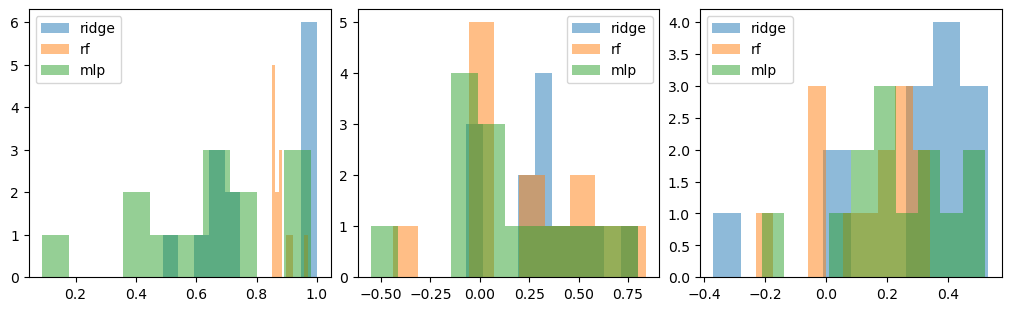

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')
for i, dset in enumerate(['train', 'val', 'test']):
    ax[i].hist(ridge[dset], label='ridge', alpha=0.5)
    ax[i].hist(rf[dset], label='rf', alpha=0.5)
    ax[i].hist(mlp[dset], label='mlp', alpha=0.5)

    ax[i].legend()

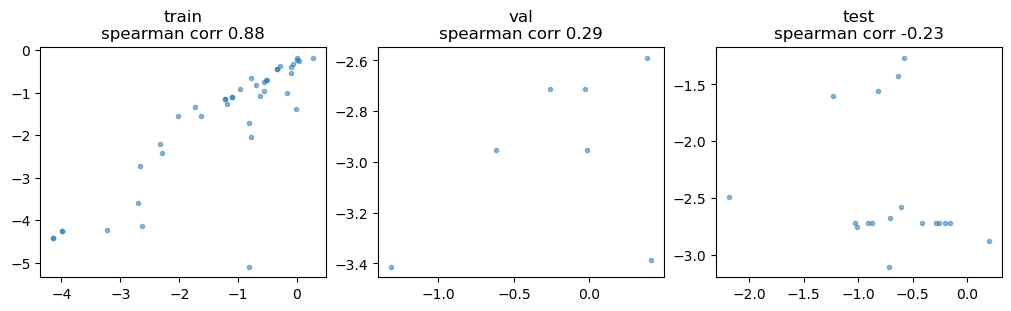

In [42]:
train_mask, val_mask, test_mask = get_split_mask(df_embed)
omit_mask = df_embed['fitness_raw'] != 0

label = 'pred_ESM650M_res_mean_RF'
fig, ax = plt.subplots(1,3, figsize=(10,3), layout='constrained')
ax[0].plot(df_embed.loc[train_mask & omit_mask, 'fitness_log'], df_embed.loc[train_mask & omit_mask, label], '.', alpha=0.5)
ax[1].plot(df_embed.loc[val_mask & omit_mask, 'fitness_log'], df_embed.loc[val_mask & omit_mask, label], '.', alpha=0.5)
ax[2].plot(df_embed.loc[test_mask & omit_mask, 'fitness_log'], df_embed.loc[test_mask & omit_mask, label], '.', alpha=0.5)

for i, dset in enumerate(['train', 'val', 'test']):
    corr = res_embed.loc[label, dset]
    ax[i].set_title(f'{dset}\nspearman corr {corr}')

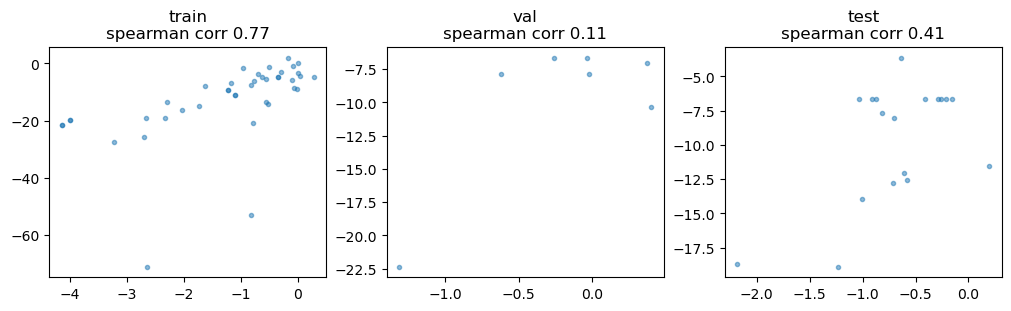

In [41]:
train_mask, val_mask, test_mask = get_split_mask(df_zeroshot)
omit_mask = df_zeroshot['fitness_raw'] != 0

label = 'pred_ESMC600M_masked_marginal'
fig, ax = plt.subplots(1,3, figsize=(10,3), layout='constrained')
ax[0].plot(df_zeroshot.loc[train_mask & omit_mask, 'fitness_log'], df_zeroshot.loc[train_mask & omit_mask, label], '.', alpha=0.5)
ax[1].plot(df_zeroshot.loc[val_mask & omit_mask, 'fitness_log'], df_zeroshot.loc[val_mask & omit_mask, label], '.', alpha=0.5)
ax[2].plot(df_zeroshot.loc[test_mask & omit_mask, 'fitness_log'], df_zeroshot.loc[test_mask & omit_mask, label], '.', alpha=0.5)

for i, dset in enumerate(['train', 'val', 'test']):
    corr = res_zeroshot.loc[label, dset]
    ax[i].set_title(f'{dset}\nspearman corr {corr}')